In [2]:
import pandas as pd
features = pd.read_csv("../data/clean_data/outlier_detect_remove.csv")
features.head()

,Id,age,Industry,job,salary,currency,country,years_field_experience,education,gender,salary_usd,new_currency
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,United States,5-7 years,Master's degree,Woman,55000.000,USD
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,GBP,United Kingdom,5-7 years,College degree,Non-binary,71169.462,USD
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,US,2 - 4 years,College degree,Woman,34000.000,USD
3,3,25-34,Nonprofits,Program Manager,62000,USD,USA,5-7 years,College degree,Woman,62000.000,USD
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,US,5-7 years,College degree,Woman,60000.000,USD


In [6]:
assert features['salary_usd'].min() < 100

AssertionError: 

In [4]:
features['job'].value_counts()

software engineer                              698
project manager                                347
director                                       246
manager                                        239
program manager                                231
                                              ... 
media designer                                   1
operations data analyst                          1
campus career center manager                     1
hrm                                              1
manager, strategic and operational projects      1
Name: job, Length: 10620, dtype: int64

In [7]:
import pandas as pd
df = pd.read_csv("../data/clean_data/outlier_detect_remove.csv")

In [8]:
df.head()

,Id,age,Industry,job,salary,currency,country,years_field_experience,education,gender,salary_usd,new_currency
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,United States,5-7 years,Master's degree,Woman,55000.000,USD
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,GBP,United Kingdom,5-7 years,College degree,Non-binary,71169.462,USD
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,US,2 - 4 years,College degree,Woman,34000.000,USD
3,3,25-34,Nonprofits,Program Manager,62000,USD,USA,5-7 years,College degree,Woman,62000.000,USD
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,US,5-7 years,College degree,Woman,60000.000,USD


In [39]:
import numpy as np
import pandas as pd
df = (
    df.assign(clean_job=lambda x: x["job"].str.lower())
    .assign(clean_job=lambda x: x["clean_job"].str.strip())
    .assign(
        clean_job=lambda x: x["clean_job"].str.replace(
            "sr", "senior", regex=False
        )
    )
    .assign(
        clean_job=lambda x: x["clean_job"].str.replace(
            "lead", "principal", regex=False
        )
    )
    .assign(
        job_counts=lambda x: x.groupby("clean_job")[
            "salary_usd"
        ].transform("count")
    )
    .assign(
        senior=lambda x: np.where(
            x["clean_job"].str.contains("senior"), 1, 0
        )
    )
    .assign(
        lead=lambda x: np.where(
            x["clean_job"].str.contains("lead"), 1, 0
        )
    )
    .assign(
        staff=lambda x: np.where(
            x["clean_job"].str.contains("staff"), 1, 0
        )
    )
    .assign(
        law=lambda x: np.where(
            x["clean_job"].str.contains("law"), 1, 0
        )
    )
    .assign(
        manager=lambda x: np.where(
            x["clean_job"].str.contains("manager"), 1, 0
        )
    )
    .assign(
        software=lambda x: np.where(
            x["clean_job"].str.contains("developer|engineer"), 1, 0
        )
    )
    .assign(
        professor=lambda x: np.where(
            x["clean_job"].str.contains("professor"), 1, 0
        )
    )
    .assign(
        data=lambda x: np.where(
            x["clean_job"].str.contains("data"), 1, 0
        )
    )
    .assign(
        assistant=lambda x: np.where(
            x["clean_job"].str.contains("assistant"), 1, 0
        )
    )
    .assign(
        intern=lambda x: np.where(
            x["clean_job"].str.contains("intern"), 1, 0
        )
    )
    .assign(
        professor=lambda x: np.where(
            x["clean_job"].str.contains("director"), 1, 0
        )
    )
    .assign(
        analyst=lambda x: np.where(
            x["clean_job"].str.contains("analyst"), 1, 0
        )
    )
    .assign(
        president=lambda x: np.where(
            x["clean_job"].str.contains("president"), 1, 0
        )
    )
    .assign(
        attorney=lambda x: np.where(
            x["clean_job"].str.contains("attorney"), 1, 0
        )
    )
    .assign(
        director=lambda x: np.where(
            x["clean_job"].str.contains("director"), 1, 0
        )
    )
    .assign(
        librarian=lambda x: np.where(
            x["clean_job"].str.contains("librarian"), 1, 0
        )
    )
    .assign(
        teacher=lambda x: np.where(
            x["clean_job"].str.contains("teacher"), 1, 0
        )
    )

)

# top_jobs = (
#     df.sort_values("job_counts", ascending=False)
#     .filter(["clean_job", "job_counts"])
#     .drop_duplicates()
#     .head(80)
# )
# top_jobs_list = top_jobs["clean_job"].unique()

In [11]:
top_jobs_list

array(['software engineer', 'project manager', 'director',
       'program manager', 'executive assistant', 'teacher', 'librarian',
       'manager', 'product manager', 'administrative assistant',
       'data analyst', 'office manager', 'software developer',
       'assistant professor', 'attorney', 'marketing manager', 'analyst',
       'operations manager', 'paralegal', 'business analyst',
       'consultant', 'associate', 'executive director', 'hr manager',
       'engineering manager', 'editor', 'data scientist',
       'account manager', 'associate director', 'associate attorney',
       'program coordinator', 'assistant director', 'project coordinator',
       'registered nurse', 'graphic designer', 'associate professor',
       'hr generalist', 'vice president', 'controller',
       'technical writer', 'director of operations', 'legal assistant',
       'accounting manager', 'communications manager', 'accountant',
       'financial analyst', 'research associate', 'engineer',
  

In [41]:
df.columns

Index(['Id', 'age', 'Industry', 'job', 'salary', 'currency', 'country',
       'years_field_experience', 'education', 'gender', 'salary_usd',
       'new_currency', 'clean_job', 'job_counts', 'senior', 'lead', 'staff',
       'intern', 'assistant', 'law', 'manager', 'software', 'professor',
       'data', 'president', 'director', 'librarian', 'teacher', 'analyst',
       'attorney'],
      dtype='object')

In [47]:
from sklearn.metrics import r2_score
final = pd.read_csv("../data/final/prediction.csv")
r2_score(final['Actual'],final['Predicted'])

0.17402299519557696

In [21]:
import numpy as np
entries = np.array(["aaa", "aab", "aca"])

import pandas as pd
pd.Series(entries).str.contains('ac|ab')

0    False
1     True
2     True
dtype: bool

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
px.line(x = K,y = Sum_of_squared_distances)

In [6]:
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
def kmeans_clustering(data):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(data.clean_job.values.tolist())
    true_k = 7
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)
    labels=model.labels_
    return labels
clusters = kmeans_clustering(clean_data)

ModuleNotFoundError: No module named 'nltk'

In [5]:
top_jobs_list

array(['software engineer', 'project manager', 'director',
       'program manager', 'executive assistant', 'teacher', 'librarian',
       'manager', 'product manager', 'administrative assistant',
       'data analyst', 'office manager', 'software developer',
       'assistant professor', 'attorney', 'marketing manager', 'analyst',
       'operations manager', 'paralegal', 'business analyst',
       'consultant', 'hr manager', 'associate', 'executive director',
       'engineering manager', 'editor', 'account manager',
       'data scientist', 'associate director', 'associate attorney',
       'program coordinator', 'assistant director', 'project coordinator',
       'registered nurse', 'graphic designer', 'associate professor',
       'hr generalist', 'vice president', 'director of operations',
       'controller', 'technical writer', 'legal assistant',
       'accounting manager', 'communications manager', 'accountant',
       'program director', 'engineer', 'research associate',
   

In [22]:
df_head = df.head(1000)

In [23]:
df_head.head()

,Id,age,Industry,job,salary,currency,currency_other,country,city,years_epxerience,...,race,salary_usd,new_currency,clean_job,job_counts,senior,lead,staff,intern,assistant
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,NaN,United States,Boston,5-7 years,...,White,55000.000,USD,research and instruction librarian,2,0,0,0,0,0
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,GBP,NaN,United Kingdom,Cambridge,8 - 10 years,...,White,71638.476,USD,change & internal communications manager,1,0,0,0,0,0
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,NaN,US,Chattanooga,2 - 4 years,...,White,34000.000,USD,marketing specialist,24,0,0,0,0,0
3,3,25-34,Nonprofits,Program Manager,62000,USD,NaN,USA,Milwaukee,8 - 10 years,...,White,62000.000,USD,program manager,197,0,0,0,0,0
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,NaN,US,Greenville,8 - 10 years,...,White,60000.000,USD,accounting manager,47,0,0,0,0,0


In [29]:
from fuzzywuzzy import process
def fuzzy_match(row):
    if len(row) < 2:
        return row
    else:
        tup = process.extract(row, top_jobs_list, limit=1)[0]
        try:
            if tup[1] >= 90:
                return tup[0]
            else:
                return "Other"
        except IndexError:
            return "Other"
df['clean_job_fixed'] = df['clean_job'].apply(fuzzy_match)

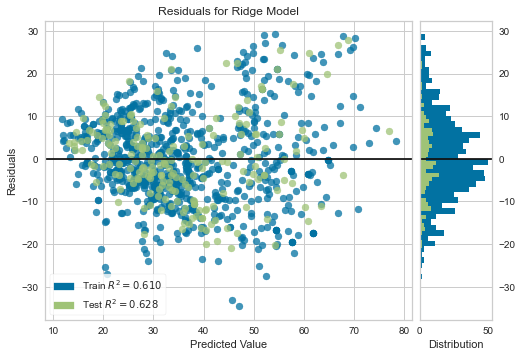

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

<Figure size 576x396 with 0 Axes>

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
visualizer.show(outpath="kelbow_minibatchkmeans.png")

In [53]:
sizes = np.linspace(0.3, 1.0, 10)
sizes

array([0.3       , 0.37777778, 0.45555556, 0.53333333, 0.61111111,
       0.68888889, 0.76666667, 0.84444444, 0.92222222, 1.        ])